### Library importing

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import seaborn as sns

### Import .csv to dataframe

In [2]:
df = pd.read_csv('responses.csv')

### Data corrections

In [3]:
df['At what age did you stop?'].replace({"I didn't stop, I still play music or sing": "Never stopped",
                                         "Above 18 years old": "> 18 years old"}, inplace=True)
df['In case you do, at what age did you start?'].replace({"Less than 5 years old": "< 5 years old"}, inplace=True)


### Plotting helpers

In [127]:
# define custom order for age ranges
ages = {"< 5 years old": 0.0,
        "5-8 years old": 1.0,
        "8-13 years old": 2.0,
        "13-18 years old": 3.0,
        "> 18 years old": 4.0,
        "Never stopped": 5.0}
inv_ages = {0.0: "< 5 years old",
            1.0: "5-8 years old",
            2.0: "8-13 years old",
            3.0: "13-18 years old",
            4.0: "> 18 years old",
            5.0: "Never stopped"}

# colors for negative-positive 5-point scale
np_scale = ['darkred', 'lightcoral', 'lightgrey', 'palegreen', 'limegreen']

# create negative to positive 5-point scale colormap
np_cmap = cm.get_cmap('viridis', 5)
np_cmap = np_cmap(np.linspace(0, 1, 5))
np_cmap[0,:] = np.array([156/256,4/256,4/256,1])
np_cmap[1,:] = np.array([252/256,124/256,124/256,1])
np_cmap[2,:] = np.array([212/256,212/256,212/256,1])
np_cmap[3,:] = np.array([116/256,252/256,140/256,1])
np_cmap[4,:] = np.array([4/256,212/256,4/256,1])
np_cmap = ListedColormap(np_cmap)

# secondary variables
sec_vars = ['all', 'male', 'female', 'spain', 'greece', 'india', 'musician', 'not_musician', 'r_musician', 'r_not_musician', 
            'radio', 'records', 'someone', 'music_positive', 'music_nonpositive', 'childhood_positive', 'childhood_nonpositive']

sec_vars_titles = ['All', 'Male', 'Female', 'Spain', 'Greece', 'India', 'Musician', 'Non-musician', 'Musician relative', 'No musician relative', 
                   'Radio/TV music', 'Records/CDs', 'Someone performing', 'Positive music experience', 'Non-positive music experience', 
                   'Positive childhood', 'Non-positive childhood']




### Demographic graphs

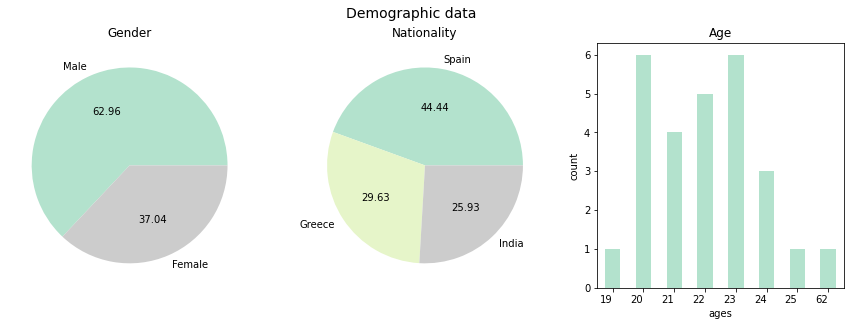

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle("Demographic data", fontsize=14)

df["Please select your gender:"].value_counts().plot.pie(ax=axes[0], 
                                                         autopct="%.2f", 
                                                         ylabel='', 
                                                         title='Gender', 
                                                         cmap="Pastel2")
                                                         
df["Please specify your nationality:"].value_counts().plot.pie(ax=axes[1], 
                                                               autopct="%.2f", 
                                                               ylabel='', 
                                                               title='Nationality', 
                                                               cmap="Pastel2")
                                                               
df["Please enter your age:"].value_counts().sort_index().plot.bar(ax=axes[2], 
                                                                  xlabel='ages', 
                                                                  ylabel='count', 
                                                                  title='Age', 
                                                                  cmap="Pastel2")

# rotate x labels
fig.autofmt_xdate(rotation=0)

### Music experience

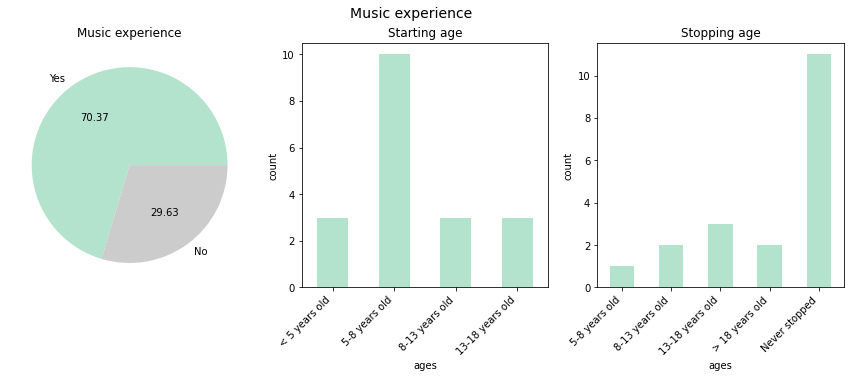

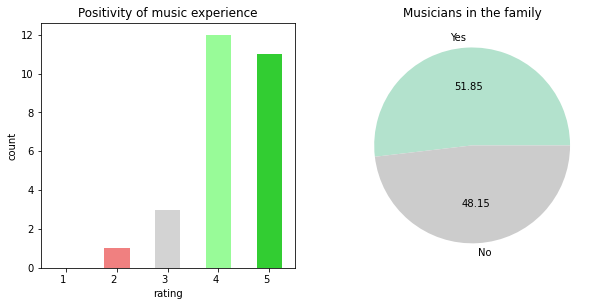

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Music experience", fontsize=14)

df['Do you have any experience playing a musical instrument or singing?'].value_counts().plot.pie(ax=axes[0], 
                                                                                                  autopct="%.2f", 
                                                                                                  ylabel='', 
                                                                                                  title='Music experience', 
                                                                                                  cmap="Pastel2")

df['In case you do, at what age did you start?'].replace(ages).value_counts().sort_index().plot.bar(ax=axes[1], 
                                                                                                    xlabel='ages',
                                                                                                    ylabel='count', 
                                                                                                    title='Starting age', 
                                                                                                    cmap="Pastel2")

# get indices present in plot
idxs = list(df['In case you do, at what age did you start?'].replace(ages).value_counts().sort_index().index)
# map them back to text responses
axes[1].set_xticklabels(labels=list(map(inv_ages.get, idxs)))
                                                                         
df['At what age did you stop?'].replace(ages).value_counts().sort_index().plot.bar(ax=axes[2], 
                                                                                   xlabel='ages', 
                                                                                   ylabel='count', 
                                                                                   title='Stopping age', 
                                                                                   cmap="Pastel2")
# get indices present in plot
idxs = list(df['At what age did you stop?'].replace(ages).value_counts().sort_index().index)
# map them back to text responses
axes[2].set_xticklabels(labels=list(map(inv_ages.get, idxs)))

# rotate x labels
fig.autofmt_xdate(rotation=45)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

np_counts = df['Do you generally think of your musical experience as positive or negative?'].value_counts().sort_index()
np_counts = pd.concat([pd.Series([0]), np_counts])  # add value for 1 which had no reponses
np_counts.sort_index().plot.bar(ax=axes[0],
                                ylabel='count',
                                xlabel='rating',
                                title='Positivity of music experience',
                                color=np_scale)
axes[0].set_xticklabels(labels=['1','2','3','4','5'])
fig.autofmt_xdate(rotation=0)

df['Is someone within your parents or relatives an amateur or professional musician?'].value_counts().plot.pie(ax=axes[1],
                                                                                                                autopct="%.2f",
                                                                                                                ylabel='',
                                                                                                                title='Musicians in the family',
                                                                                                                cmap="Pastel2")
fig.autofmt_xdate(rotation=0)




### Childhood

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

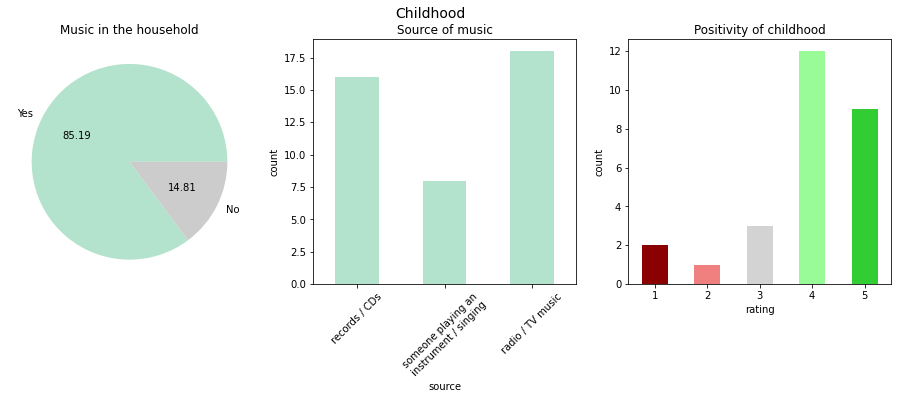

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4.5))
fig.suptitle("Childhood", fontsize=14)

df['When you think about your childhood, do you recall music being played regularly at home? '].value_counts().plot.pie(ax=axes[0],
                                                                                                                        autopct="%.2f",
                                                                                                                        ylabel='', 
                                                                                                                        title='Music in the household', 
                                                                                                                        cmap="Pastel2")

# this was a multiple choice question, so we need to parse each response
means_responses = df['In case music was played at home, it was...'].tolist()
means_labels = ['records / CDs', 'someone playing an instrument / singing', 'radio / TV music']
means_cnt = [0, 0, 0]
# count occurences
for r in means_responses:
    for j, l in enumerate(means_labels):
        if l in str(r):  # cast to string to ignore nan
            means_cnt[j] += 1
means_labels[1] = 'someone playing an\ninstrument / singing'

df_means = pd.DataFrame(list(zip(means_labels, means_cnt)), columns=['labels', 'count'])
df_means.plot.bar(ax=axes[1], 
                  legend=False,
                  ylabel='count', 
                  xlabel='source',
                  title='Source of music', 
                  cmap="Pastel2")
axes[1].set_xticklabels(labels=df_means['labels'], rotation=45)

np_counts = df['Do you generally recall your childhood as positive or negative?'].value_counts().sort_index()
np_counts.sort_index().plot.bar(ax=axes[2],
                                ylabel='count',
                                xlabel='rating',
                                title='Positivity of childhood',
                                color=np_scale)
axes[2].set_xticklabels(labels=['1','2','3','4','5'], rotation=0)

### Word clouds

### Correlation table

### Mood and Vividness vs secondary variables, for all categories

##### Collect all variables

In [48]:
mood = {'':{}, '.1': {}, '.2': {}, '.3': {}, '.4': {}, '.5': {}, '.6': {}}
vivid = {'':{}, '.1': {}, '.2': {}, '.3': {}, '.4': {}, '.5': {}, '.6': {}}
q1 = "How would you rate the mood associated with the particular memory? "
q2 = "How would you rate the vividness of this memory?"

for i in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:

    # FOR MOOD 

    # all responses
    mood[i]['all'] = df[q2+i].value_counts().sort_index()

    # gender
    mood[i]['male'] = df.loc[df['Please select your gender:']=='Male', q1+i].value_counts().sort_index()
    mood[i]['female'] = df.loc[df['Please select your gender:']=='Female', q1+i].value_counts().sort_index()

    # nationality
    mood[i]['spain'] = df.loc[df['Please specify your nationality:']=='Spain', q1+i].value_counts().sort_index()
    mood[i]['greece'] = df.loc[df['Please specify your nationality:']=='Greece', q1+i].value_counts().sort_index()
    mood[i]['india'] = df.loc[df['Please specify your nationality:']=='India', q1+i].value_counts().sort_index()

    # musician
    mood[i]['musician'] = df.loc[df['Do you have any experience playing a musical instrument or singing?']=='Yes', q1+i].value_counts().sort_index()
    mood[i]['not_musician'] = df.loc[df['Do you have any experience playing a musical instrument or singing?']=='No', q1+i].value_counts().sort_index()

    # relative that is musician
    mood[i]['r_musician'] = df.loc[df['Is someone within your parents or relatives an amateur or professional musician?']=='Yes', q1+i].value_counts().sort_index()
    mood[i]['r_not_musician'] = df.loc[df['Is someone within your parents or relatives an amateur or professional musician?']=='No', q1+i].value_counts().sort_index()
    
    # types of music in the household
    mood[i]['radio'] = df.loc[df['In case music was played at home, it was...'].str.contains('radio', na=False), q1+i].value_counts().sort_index()
    mood[i]['records'] = df.loc[df['In case music was played at home, it was...'].str.contains('records', na=False), q1+i].value_counts().sort_index()
    mood[i]['someone'] = df.loc[df['In case music was played at home, it was...'].str.contains('someone', na=False), q1+i].value_counts().sort_index()

    # positivity of music experience - positive is 4-5, non-positive is 1-3, since we have too many variables and few non-positive responses
    positivity = [df.loc[df['Do you generally think of your musical experience as positive or negative?']==str(p), q1+i] for p in range(1,6)]
    mood[i]['music_positive'] = pd.concat([positivity[4], positivity[3]], ignore_index=True).value_counts().sort_index()
    mood[i]['music_nonpositive'] = pd.concat([positivity[0], positivity[1], positivity[2]], ignore_index=True).value_counts().sort_index()

    childhood = [df.loc[df['Do you generally recall your childhood as positive or negative?']==str(p), q1+i] for p in range(1,6)]
    mood[i]['childhood_positive'] = pd.concat([childhood[4], childhood[3]], ignore_index=True).value_counts().sort_index()
    mood[i]['childhood_nonpositive'] = pd.concat([childhood[0], childhood[1], childhood[2]], ignore_index=True).value_counts().sort_index()


    # FOR VIVIDNESS

    # all responses
    vivid[i]['all'] = df[q2+i].value_counts().sort_index()

    # gender
    vivid[i]['male'] = df.loc[df['Please select your gender:']=='Male', q2+i].value_counts().sort_index()
    vivid[i]['female'] = df.loc[df['Please select your gender:']=='Female', q2+i].value_counts().sort_index()

    # nationality
    vivid[i]['spain'] = df.loc[df['Please specify your nationality:']=='Spain', q2+i].value_counts().sort_index()
    vivid[i]['greece'] = df.loc[df['Please specify your nationality:']=='Greece', q2+i].value_counts().sort_index()
    vivid[i]['india'] = df.loc[df['Please specify your nationality:']=='India', q2+i].value_counts().sort_index()

    # musician
    vivid[i]['musician'] = df.loc[df['Do you have any experience playing a musical instrument or singing?']=='Yes', q2+i].value_counts().sort_index()
    vivid[i]['not_musician'] = df.loc[df['Do you have any experience playing a musical instrument or singing?']=='No', q2+i].value_counts().sort_index()

    # relative that is musician
    vivid[i]['r_musician'] = df.loc[df['Is someone within your parents or relatives an amateur or professional musician?']=='Yes', q2+i].value_counts().sort_index()
    vivid[i]['r_not_musician'] = df.loc[df['Is someone within your parents or relatives an amateur or professional musician?']=='No', q2+i].value_counts().sort_index()
    
    # types of music in the household
    vivid[i]['radio'] = df.loc[df['In case music was played at home, it was...'].str.contains('radio', na=False), q2+i].value_counts().sort_index()
    vivid[i]['records'] = df.loc[df['In case music was played at home, it was...'].str.contains('records', na=False), q2+i].value_counts().sort_index()
    vivid[i]['someone'] = df.loc[df['In case music was played at home, it was...'].str.contains('someone', na=False), q2+i].value_counts().sort_index()

    # positivity of music experience - positive is 4-5, non-positive is 1-3, since we have too many variables and few non-positive responses
    positivity = [df.loc[df['Do you generally think of your musical experience as positive or negative?']==str(p), q2+i] for p in range(1,6)]
    vivid[i]['music_positive'] = pd.concat([positivity[4], positivity[3]], ignore_index=True).value_counts().sort_index()
    vivid[i]['music_nonpositive'] = pd.concat([positivity[0], positivity[1], positivity[2]], ignore_index=True).value_counts().sort_index()

    childhood = [df.loc[df['Do you generally recall your childhood as positive or negative?']==str(p), q2+i] for p in range(1,6)]
    vivid[i]['childhood_positive'] = pd.concat([childhood[4], childhood[3]], ignore_index=True).value_counts().sort_index()
    vivid[i]['childhood_nonpositive'] = pd.concat([childhood[0], childhood[1], childhood[2]], ignore_index=True).value_counts().sort_index()


##### Plot

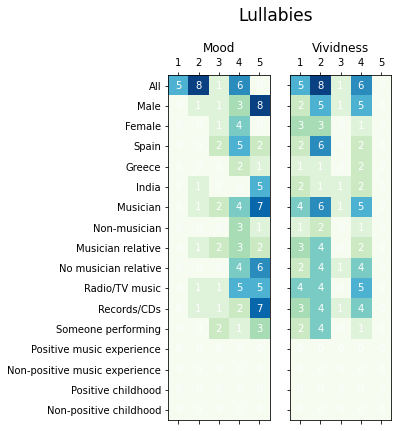

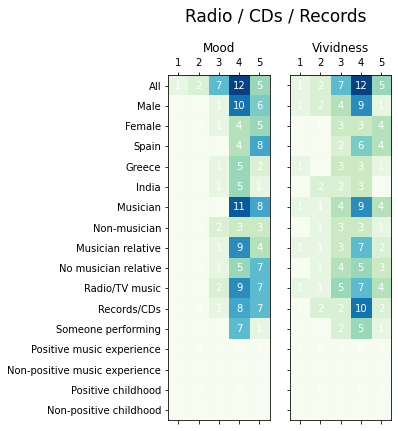

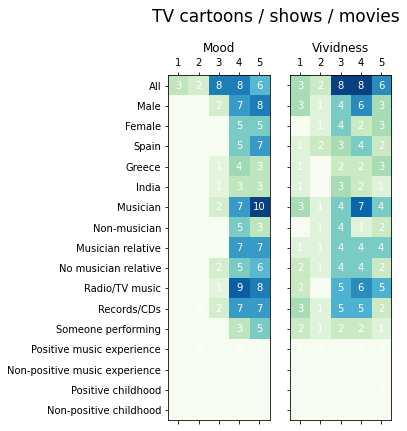

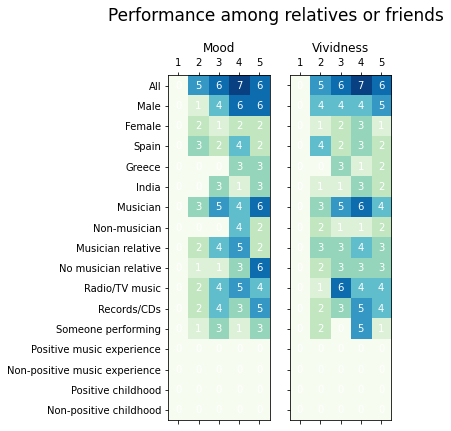

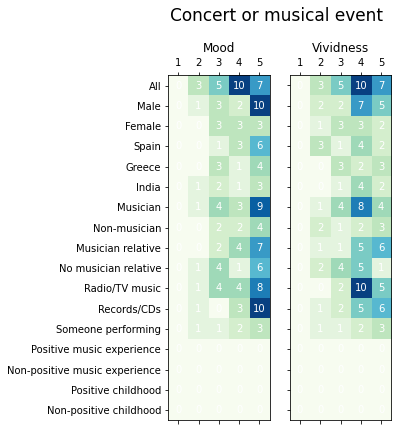

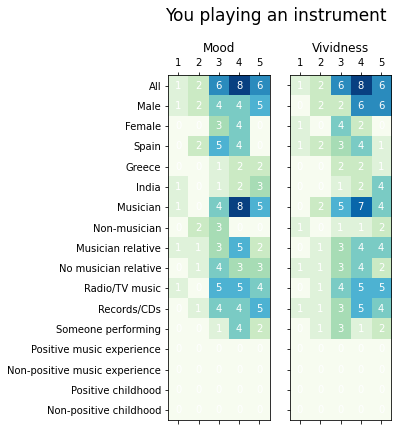

In [138]:
titles = {'':'Lullabies', 
          '.1': "Radio / CDs / Records", 
          '.2': 'TV cartoons / shows / movies', 
          '.3': 'Performance among relatives or friends', 
          '.4': 'Concert or musical event', 
          '.5': 'You playing an instrument', 
          '.6': 'Music class'}

for q in ['', '.1', '.2', '.3', '.4', '.5', '.6']:

    mood_ = np.zeros((17,5))
    for i, cat in enumerate(sec_vars):
        for entry in zip(mood[q][cat].index.values.tolist(), mood[q][cat].tolist()):
            mood_[i, int(entry[0]-1)] = entry[1]
    vivid_ = np.zeros((17,5))
    for i, cat in enumerate(sec_vars):
        for entry in zip(vivid[q][cat].index.values.tolist(), vivid[q][cat].tolist()):
            vivid_[i, int(entry[0]-1)] = entry[1]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4,7))
    plt.suptitle(titles[q], fontsize=17)

    # mood
    axes[0].matshow(mood_, cmap='GnBu')
    axes[0].set_yticks(ticks=range(17))
    axes[0].set_yticklabels(labels=sec_vars_titles)
    axes[0].set_xticks(ticks=range(5))
    axes[0].set_xticklabels(labels=['1','2','3','4','5'])
    axes[0].set_title("Mood")
    for i in range(17):
        for j in range(5):
            text = axes[0].text(j, i, str(int(mood_[i][j])),
                        ha="center", va="center", color="w")

    # vividness
    right = axes[1].matshow(vivid_, cmap='GnBu')
    axes[1].set_title("Vividness")
    axes[1].set_xticks(ticks=range(5))
    axes[1].set_xticklabels(labels=['1','2','3','4','5'])
    axes[1].set_yticks(ticks=range(17))
    axes[1].set_yticklabels(labels=['','','','','','','','','','','','','','','','','',])
    for i in range(17):
        for j in range(5):
            text = axes[1].text(j, i, str(int(vivid_[i][j])),
                        ha="center", va="center", color="w")

### Emotions for all categories